In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

#Support vector machine library
from sklearn import svm

import seaborn as sns

## Classificeer appels op basis van hun groenheid en rondheid
### Lineair scheidbare data

In [21]:
# Importeer de dataset

dataset = pd.read_csv('appels.csv')

# Toon de eerste rijen van de dataset
dataset.head()

rondheid  groenheid  appel
0         9          8      1
1        10          7      1
2         2          3      0
3         1          2      0
4         5          8      1

In [22]:
# Splits op in features en targets
# features: x1 = rondheid en x2 = groenheid

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values 
y= dataset['appel'].values

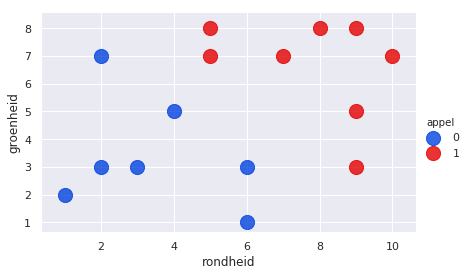

In [23]:
# Plot een scatterplot met seaborn

sns.set(font_scale = 1) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':200}, height=4, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)

In [31]:
SVMmodel = svm.SVC(kernel='linear',C=0.01)
SVMmodel.fit(X, y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
#voorspel de klasse van een rondheid=8 en een groenheid van 6

print(SVMmodel.predict(np.array([8,6]).reshape(1,-1)))


#voorspel de klasse van een rondheid=4 en een groenheid van 4

print(SVMmodel.predict(np.array([4,4]).reshape(1,-1)))


[1]
[0]


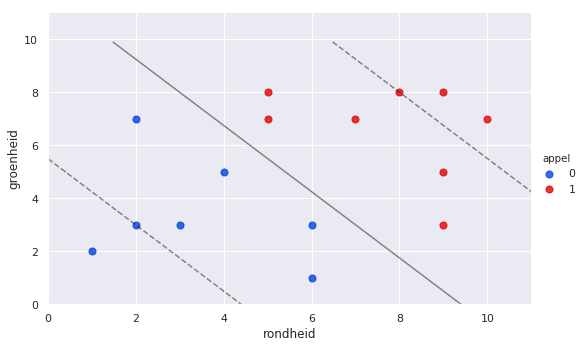

In [33]:
h = 0.1
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)


sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


### Dataset met uitschieter

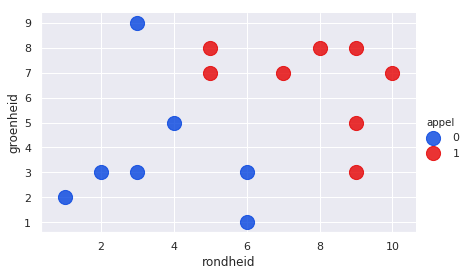

In [34]:
dataset.loc[14:14,'rondheid':'groenheid']=3,9

sns.set(font_scale = 1) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':200}, height=4, aspect=1.5)



In [41]:
features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values 
y= dataset['appel'].values


SVMmodel = svm.SVC(kernel='linear',C=0.01)
SVMmodel.fit(X, y)

print(SVMmodel.support_vectors_)



[[2. 3.]
 [6. 3.]
 [3. 3.]
 [4. 5.]
 [6. 1.]
 [3. 9.]
 [5. 8.]
 [7. 7.]
 [9. 5.]
 [9. 3.]
 [5. 7.]
 [8. 8.]]


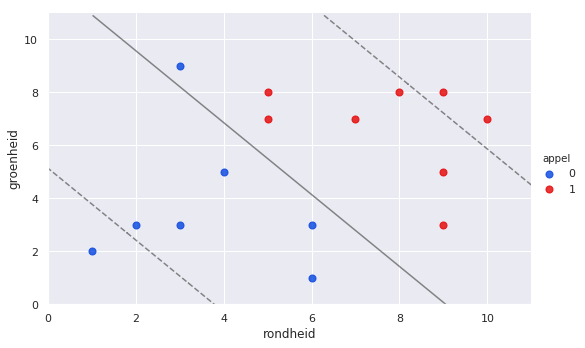

In [42]:
# Visualiseer de decision boundary

h = 0.1
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)


sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])



### Niet-lineair scheidbare data en kernel SVM

In [43]:
dataset =pd.read_csv('appels_non_linear.csv')
dataset.head()

rondheid  groenheid  appel
0         9          8      1
1        10          7      1
2         2          3      0
3         1          2      0
4         5          8      1

In [44]:
# Opsplitsen in features en targets

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values 
y= dataset['appel'].values

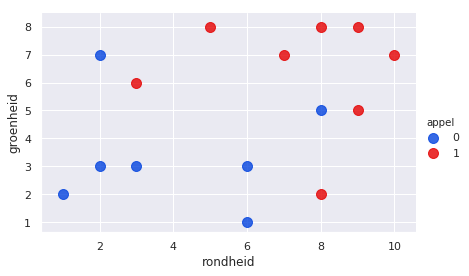

In [45]:
#Plot een scatterplot met seaborn

sns.set(font_scale = 1) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':100}, height=4, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)

In [48]:
SVMmodel = svm.SVC(kernel='linear',C=0.1)
SVMmodel.fit(X, y)

print(SVMmodel.support_vectors_)

[[6. 3.]
 [8. 5.]
 [6. 1.]
 [2. 7.]
 [5. 8.]
 [9. 5.]
 [8. 2.]
 [3. 6.]]


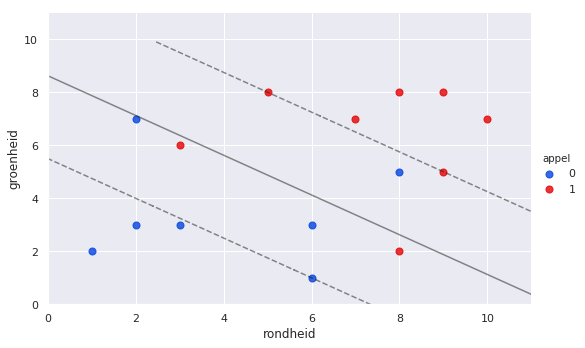

In [49]:
# Visualiseer de decision boundary

h = 0.1
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = SVMmodel.decision_function(xy).reshape(xx.shape)


sns.set(font_scale = 1)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


In [16]:
# SVM met polynomial kernel

SVMmodel = svm.SVC(kernel='poly',C=10000000)
SVMmodel.fit(X, y)
print(SVMmodel.support_vectors_)

[[8. 5.]
 [6. 1.]
 [2. 7.]
 [9. 5.]
 [3. 6.]]


/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


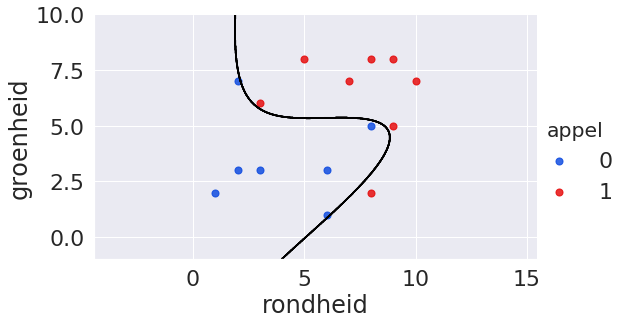

In [17]:
# Visualiseer de decision boundary

h = 0.01
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))
Z = SVMmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':50}, height=5, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.axis('equal')
plt.contour(xx, yy, Z, colors='black')

In [60]:
# SVM met RBF kernel

SVMmodel = svm.SVC(kernel='rbf',C=1, gamma=10)
SVMmodel.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

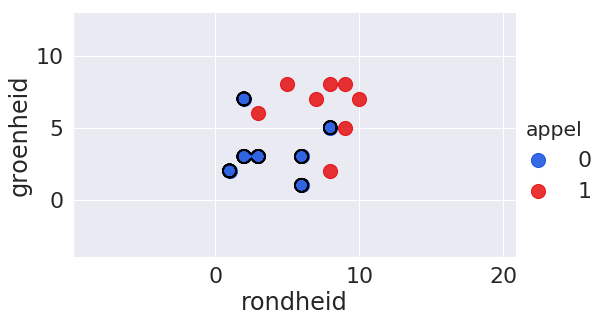

In [61]:
# Visualiseer de decision boundary

h = 0.01
rond_min = X[:,0].min()-5
rond_max = X[:,0].max()+5
groen_min = X[:,1].min()-5
groen_max = X[:,1].max()+5
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))
Z = SVMmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':200}, height=5, aspect=1.5)
plt.ylim(-4, 11)
plt.xlim(-4, 11)
plt.axis('equal')
plt.contour(xx, yy, Z, colors='black')